

# 深度图分辨率设置与读取

```
@作者: 阿凯爱玩机器人
@QQ: 244561792
@微信: xingshunkai
@邮箱: xingshunkai@qq.com
@网址: deepsenserobot.com
@B站: "阿凯爱玩机器人"
```

## 导入依赖

In [1]:
import time
import sys
import os

# 导入阿凯写的Orbbec工具库
# 确保orbbec_utils.py跟你目前所执行的脚本在同一级目录下
from orbbecsdk_utils import *
# 添加Python Path
add_path_pyorbbecsdk()

# 导入pyorbbecsdk
from pyorbbecsdk import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## 连接相机

In [3]:
# 连接设备
ret, device = connect_device()
print(f"[INFO] 设备是否连接成功: {ret}")

[06/24 13:47:50.664448][info][18552][Context.cpp:68] Context created with config: default config!
[06/24 13:47:50.664463][info][18552][Context.cpp:73] Work directory=/home/kyle/Project/奥比中光3D相机/Gemini335-软件资料-阿凯爱玩机器人/02.奥比中光-pyobbecsdk示例代码(Gemini335), SDK version=v1.10.5-20240511-7dc8be9
[06/24 13:47:50.664487][info][18552][LinuxPal.cpp:31] createObPal: create LinuxPal!
[06/24 13:47:50.736962][info][18552][LinuxPal.cpp:142] Create PollingDeviceWatcher!
[06/24 13:47:50.736979][info][18552][DeviceManager.cpp:15] Current found device(s): (1)
[06/24 13:47:50.736983][info][18552][DeviceManager.cpp:24] 	- Name: Orbbec Gemini 335, PID: 0x0800, SN/ID: CP1L44P00049, Connection: USB3.2
[INFO] 设备是否连接成功: True


## 创建Pipeline

In [4]:
# 创建Pipeline
# 将device传入Pipeline
pipeline = Pipeline(device)

# 创建配置信息对象
config = Config()

## 彩图基本参数配置 
一般在实际使用的过程中, 深度图还是跟彩图一起获取的。

基本参数包括如下信息:
* 图像宽度
* 图像高度
* 图像格式
* 帧率

In [35]:
# 获取彩图选项列表
color_profile_list = pipeline.get_stream_profile_list(OBSensorType.COLOR_SENSOR) 

# 手动创建视频流索引
# 获取视频流索引
width = 1280 # 图像宽度
height = 720 # 图像高度
fmt = OBFormat.MJPG # 图像格式
fps = 30 # 帧率

try:
    # 手动创建彩色视频流配置信息
    color_profile = color_profile_list.get_video_stream_profile(width, height, fmt, fps)
    # 打印配置信息
    print_video_profile(color_profile)
except OBError:
    print("[ERROR] 没有对应的配置信息选项")

视频流类型: OBStreamType.COLOR_STREAM
视频流格式: OBFormat.MJPG
分辨率 1280 x 720 帧率 30


## 深度图基本参数配置

基本参数包括如下信息:
* 图像宽度
* 图像高度
* 图像格式
* 帧率

### 获取基本参数列表

In [6]:
# 获取深度图选项列表
depth_profile_list = pipeline.get_stream_profile_list(OBSensorType.DEPTH_SENSOR)   

In [7]:
# 获取选项个数
profile_num = depth_profile_list.get_count()
print(f"总共有{profile_num}个深度图选项")

总共有30个深度图选项


### 获取默认配置

In [8]:
# 获取默认的视频流配置
depth_profile_default = depth_profile_list.get_default_video_stream_profile()
print(type(depth_profile_default))
# 打印默认配置
print_video_profile(depth_profile_default)

<class 'pyorbbecsdk.VideoStreamProfile'>
视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 848 x 480 帧率 30


### 获取特定编号的配置信息

In [9]:
def print_depth_profile(index):
    '''打印深度图配置信息'''
    # 获取选项信息
    profile = depth_profile_list.get_stream_profile_by_index(index)

    print(f"当前的Profile是否为视频流配置信息: {profile.is_video_stream_profile()}")
    # 将选项信息转换为Video Stream Profile的格式
    depth_profile_by_index = profile.as_video_stream_profile()
    # 打印配置信息
    print_video_profile(depth_profile_by_index)

In [10]:
print_depth_profile(0)

当前的Profile是否为视频流配置信息: True
视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 848 x 480 帧率 30


In [11]:
# for i in range(profile_num):
#     print(f"可选配置项: #{i}")
#     print_depth_profile(i)

可选配置项: #0
当前的Profile是否为视频流配置信息: True
视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 848 x 480 帧率 30
可选配置项: #1
当前的Profile是否为视频流配置信息: True
视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 424 x 240 帧率 60
可选配置项: #2
当前的Profile是否为视频流配置信息: True
视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 424 x 240 帧率 30
可选配置项: #3
当前的Profile是否为视频流配置信息: True
视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 424 x 240 帧率 15
可选配置项: #4
当前的Profile是否为视频流配置信息: True
视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 424 x 240 帧率 6
可选配置项: #5
当前的Profile是否为视频流配置信息: True
视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 480 x 270 帧率 60
可选配置项: #6
当前的Profile是否为视频流配置信息: True
视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 480 x 270 帧率 30
可选配置项: #7
当前的Profile是否为视频流配置信息: True
视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 480 x 270 帧率 15
可选配置项: #8
当前的Profile是否为视频流配置信息: True
视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 480 x 270 帧率 6
可选配置项: #9
当前

### 手动创建配置信息

In [12]:
# 手动创建视频流索引
# 获取视频流索引
# 这里需要注意, 深度图与彩图的分辨率并不完全一致
width = 1280 # 图像宽度
height = 800 # 图像高度
fmt = OBFormat.Y16 # 图像格式
fps = 30 # 帧率

try:
    # 手动创建深度图视频流配置信息
    depth_profile = depth_profile_list.get_video_stream_profile(width, height, fmt, fps)
    # 打印配置信息
    print_video_profile(depth_profile)
except OBError:
    print("[ERROR] 没有对应的配置信息选项")


视频流类型: OBStreamType.DEPTH_STREAM
视频流格式: OBFormat.Y16
分辨率 1280 x 800 帧率 30


## 设置对齐模式

需要注意的是, 默认采集的深度图是在左侧红外相机坐标系下的， 不是在RGB彩色相机坐标系下的。 
如果需要将深度图转换为彩色相机坐标系下， 则需要对齐模式。

* Gemini2: 支持硬件对齐
* Gemini335: 不支持硬件对齐

In [13]:
# 软件对齐模式
align_mode = "SW"

if align_mode == 'SW':
    # 软件对齐
    config.set_align_mode(OBAlignMode.SW_MODE)
else:
    # 不对齐
    config.set_align_mode(OBAlignMode.DISABLE)    

## 帧同步

配置同时获取彩图与深度图

* Gemini2是有这个功能的

* Gemini335不支持帧同步

In [14]:
# pipeline.enable_frame_sync()

In [15]:
# 禁用帧同步
# pipeline.disable_frame_sync()

## 禁用LDP

LDP(Laser Distance Protect)的功能是近距离保护， 当物体距离相机的最近距离小于特定的值时候，自动关闭激光投射器。 此时获取的深度图无效。 
一般可以禁用LDP的功能，防止LDP传感器误判，造成深度图的不稳定。 

In [16]:
# 配置是否开启LDP功能
enable_ldp = False
# 设置设备的LDP配置项
device.set_bool_property(OBPropertyID.OB_PROP_LDP_BOOL, enable_ldp)

## 让配置生效

In [17]:
# Gemini335 如果开始前就stop，程序会崩溃。
# 在修改管道配置之前，需要先停止数据流传输
# pipeline.stop()

# 在配置信息里面定义彩色视频流的基本信息
config.enable_stream(depth_profile)

# 开启管道
pipeline.start(config)

[06/24 13:47:51.269460][error][18552][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }
[06/24 13:47:51.269764][error][18552][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }


## 读取彩图与深度图

从管道(pipeline)中获取数据帧。相机初始化的时候，前几次从pipeline中读取数据帧可能是失败的，因此可以多读取几次。

In [31]:
ret, color_img, depth_img = capture(pipeline)

图像展示,直接用Matplotlib显示。

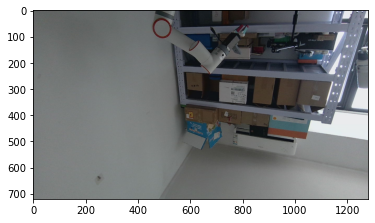

In [32]:
# 绘制彩图
if ret:
    plt.imshow(color_img[:, :, ::-1])

In [33]:
depth_img.shape

(720, 1280)

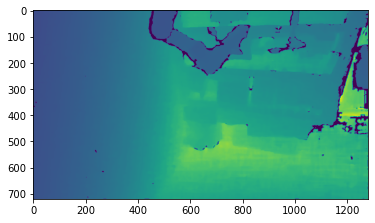

In [34]:
# 绘制深度图
if ret:
    plt.imshow(depth_img)

深度图保存，深度图的格式本质上就是Numpy的Ndarray对象

In [ ]:
# 保存彩图
cv2.imwrite("demo.png", color_img)

# 保存深度图
np.save("demo.npy", depth_img)

这里可以关注下深度图的尺寸

In [ ]:
depth_img.shape

原始的深度图尺寸为`1280 x 800`, 因为我们选择的是对齐模式，因此采集到的彩色相机下的深度图尺寸跟彩图一致，分辨率为`1280 x 720`, 不需要自己重新裁剪了。